<a href="https://colab.research.google.com/github/ArunodayGupta/Electricity_Bill_Predictor/blob/main/Notebook/Final_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
df = pd.read_csv("electricity_bill_dataset.csv")
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [49]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [50]:
print(df["MotorPump"].unique())
df = df.drop(columns=["MotorPump"])
print(df.columns)
print(df.isnull().sum())

[0]
Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64



*   removing the Motorpump column as the value in that column are 0.
*   Since all other columns contain no null values we can continue.



In [51]:

# splitting the data into training and test data
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

input_cols=list(train_df.columns)[0:-1]
target_col="ElectricityBill"

train_input=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

test_input=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

In [52]:
#dividing the columns based on their datatype
numeric_cols = train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_input.select_dtypes('object').columns.tolist()

#using minmaxscaler to
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

train_input[numeric_cols]=scaler.transform(train_input[numeric_cols])
test_input[numeric_cols]=scaler.transform(test_input[numeric_cols])

#using onehotencoder to encode the categorical values
encoder=OneHotEncoder(sparse_output=False)
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

train_final=train_input[numeric_cols+encoded_cols]
test_final=test_input[numeric_cols+encoded_cols]

print(train_final)
print(test_final)

(36276, 58)
(36276,)
(9069, 58)
(9069,)
            Fan  Refrigerator  AirConditioner  Television   Monitor     Month  \
12362  0.166667      0.833333        0.333333    0.473684  0.000000  0.727273   
26357  0.888889      1.000000        1.000000    0.421053  1.000000  0.090909   
22319  0.722222      0.833333        0.333333    0.473684  1.000000  0.000000   
32505  0.944444      0.833333        0.333333    0.000000  0.000000  0.818182   
43651  0.055556      0.500000        0.666667    0.894737  0.545455  0.272727   
...         ...           ...             ...         ...       ...       ...   
11284  0.000000      0.500000        0.000000    0.421053  0.000000  0.909091   
44732  0.111111      0.166667        1.000000    0.578947  0.000000  0.090909   
38158  0.833333      0.833333        0.666667    0.894737  1.000000  1.000000   
860    0.722222      0.833333        0.333333    0.105263  1.000000  0.272727   
15795  0.833333      0.833333        0.333333    0.473684  1.000000  


*   dividing tthe columns into numeric and categorical columns
*   Using minmax scaler on the numeric data to scale the data and nomralize it
*   using OneHotEncoder on categorical columns to encode them
*   putting together the final training and testing input





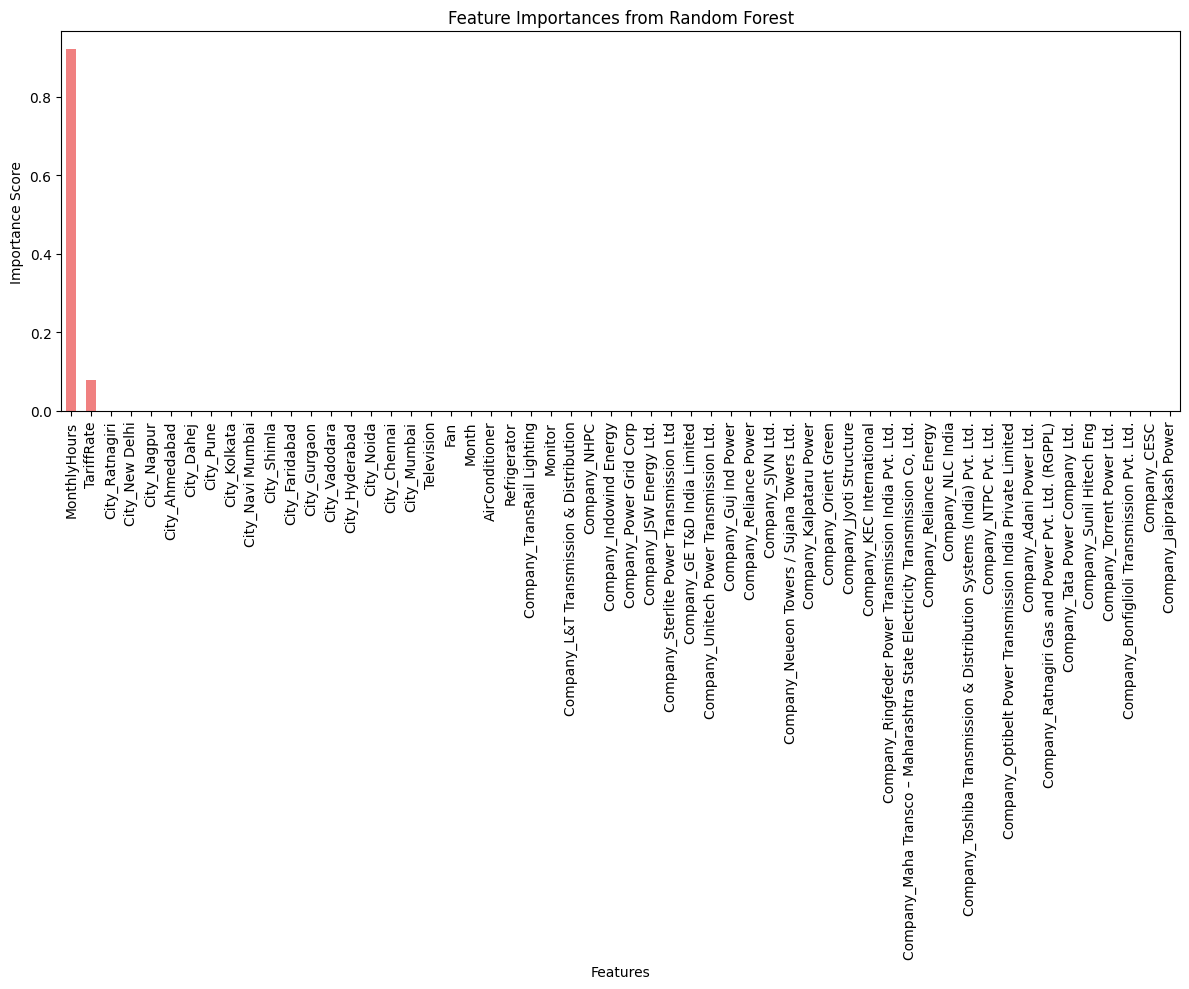

MonthlyHours                                                                  9.208584e-01
TariffRate                                                                    7.789887e-02
City_Ratnagiri                                                                2.549771e-04
City_New Delhi                                                                2.300902e-04
City_Nagpur                                                                   1.416409e-04
City_Ahmedabad                                                                1.067778e-04
City_Dahej                                                                    6.910604e-05
City_Pune                                                                     6.329489e-05
City_Kolkata                                                                  6.234542e-05
City_Navi Mumbai                                                              5.413930e-05
City_Shimla                                                                   4.092874e-05

In [60]:
#using random forest model to predict the electricity bill
model = RandomForestRegressor(n_jobs=-1,n_estimators=150, random_state=42)
model.fit(train_final, train_target)
#predicting for testing data
predict_target=model.predict(test_final)

#list of the features based on their importance in the model
feature_importance = pd.Series(model.feature_importances_, index=train_final.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(12, 10), color='lightcoral')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()
print(feature_importance)


* Here we are training the model on the training data and predicting values for the testing data
* Here we a plot a graph based on the features based on their importance in the given model



RMSE : 5.277358200465166
R2 Score : 0.9999755572709921


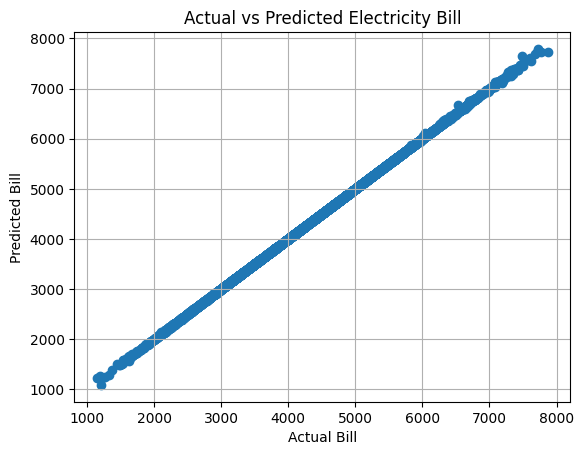

In [62]:
rmse=np.sqrt(mean_squared_error(test_target,predict_target))
r2=r2_score(test_target,predict_target)

print("RMSE :",rmse)
print("R2 Score :", r2)

plt.scatter(test_target,predict_target)
plt.xlabel("Actual Bill")
plt.ylabel("Predicted Bill")
plt.title("Actual vs Predicted Electricity Bill")
plt.grid(True)
plt.show()


* we are calculating the rmse value and r2 value for the predicted test data
* we are also plotting a graph for the actual vs predicted electricity bill

